Hello Rossi!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Import Packages 

In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from lightgbm import LGBMRegressor
import xgboost as xgb

import warnings

warnings.filterwarnings("ignore")

## Import Data

In [2]:
df = pd.read_csv('/datasets/car_data.csv')

In [3]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [4]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


## Preprocessing

In [5]:
# convert column names to lowercase
df.columns = df.columns.str.lower().str.strip()
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [7]:
df[["datecrawled", "datecreated", "lastseen"]] = df[
    ["datecrawled", "datecreated", "lastseen"]
].apply(pd.to_datetime, infer_datetime_format=True)
df.dtypes

datecrawled          datetime64[ns]
price                         int64
vehicletype                  object
registrationyear              int64
gearbox                      object
power                         int64
model                        object
mileage                       int64
registrationmonth             int64
fueltype                     object
brand                        object
notrepaired                  object
datecreated          datetime64[ns]
numberofpictures              int64
postalcode                    int64
lastseen             datetime64[ns]
dtype: object

### Missing Values

In [8]:
# Check for NaN
display(df.isna().sum())

datecrawled              0
price                    0
vehicletype          37490
registrationyear         0
gearbox              19833
power                    0
model                19705
mileage                  0
registrationmonth        0
fueltype             32895
brand                    0
notrepaired          71154
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64

In [13]:
columns_with_missing_values = [
    "vehicletype",
    "gearbox",
    "model",
    "fueltype",
    "notrepaired",
]
df[columns_with_missing_values] = df[columns_with_missing_values].fillna("unknown")
df.isna().sum()

datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
mileage              0
registrationmonth    0
fueltype             0
brand                0
notrepaired          0
datecreated          0
lastseen             0
dtype: int64

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You're 100% right about dropping these columns. But why you dropped NaNs? You lost a lot of data beacuse of it. When you remove the whole row because of NaN in one column you lose information from all other columns which can be useful for model training. Thus, in 99% of cases it's better to fill NaN than to drop them.
    
When you need to fill NaNs in categorical columns there is a super easy and well work method. You can fill NaNs in categorical features using a placeholder, for example, using the string "unknown". My experience shows that in the vast majority of cases, this simple method of filling in the NaNs works better than the most advanced methods.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Well done

</div>

### Categories of Categorical Variables

In [14]:
categorical_variables = ['vehicletype','gearbox','model','fueltype', 'notrepaired','brand']

for x in categorical_variables:
    print(df[x].value_counts())
    print()

encoder = OrdinalEncoder()
encoder.fit(df[categorical_variables])
df[categorical_variables] = encoder.transform(df[categorical_variables])

sedan          91457
small          79831
wagon          65166
unknown        37490
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicletype, dtype: int64

manual     268251
auto        66285
unknown     19833
Name: gearbox, dtype: int64

golf                  29232
other                 24421
3er                   19761
unknown               19705
polo                  13066
                      ...  
serie_2                   8
rangerover                4
serie_3                   4
range_rover_evoque        2
serie_1                   2
Name: model, Length: 251, dtype: int64

petrol      216352
gasoline     98720
unknown      32895
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fueltype, dtype: int64

no         247161
unknown     71154
yes         36054
Name: notrepaired, dtype: int64

volkswagen        77013
opel              39931
bmw               36914
merced

### Converting Dates to DateTime

In [15]:
df['datecrawled'] = pd.to_datetime(df['datecrawled'], format='%d/%m/%Y %H:%M')
df['datecreated'] = pd.to_datetime(df['datecreated'], format='%d/%m/%Y %H:%M')
df['lastseen'] = pd.to_datetime(df['lastseen'], format='%d/%m/%Y %H:%M')

### Looking at Duplicates

In [16]:
display(df.duplicated().sum())

299

### Date Column

In [17]:
# check the descriptive statistics of the registration
df.registrationyear.describe(), df.datecreated.dt.year.describe()

(count    354369.000000
 mean       2004.234448
 std          90.227958
 min        1000.000000
 25%        1999.000000
 50%        2003.000000
 75%        2008.000000
 max        9999.000000
 Name: registrationyear, dtype: float64,
 count    354369.000000
 mean       2015.999924
 std           0.009046
 min        2014.000000
 25%        2016.000000
 50%        2016.000000
 75%        2016.000000
 max        2016.000000
 Name: datecreated, dtype: float64)

In [18]:
#years below 1900 and above 'date created
condition = (df["registrationyear"] > df["datecreated"].dt.year) | (
    df["registrationyear"] < 1900
)

display(len(df[condition]) / len(df) * 100)
print()

# data that does not have the above conditions
df = df[~(condition)]

# age of the vehicle
df["vehicleage"] = df["datecreated"].dt.year - df["registrationyear"]

# Check results
df.head(5)

4.118870442956354

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,lastseen,vehicleage
0,2016-03-24 11:52:00,480,7.0,1993,1.0,0,116.0,150000,0,6.0,38.0,1.0,2016-03-24,2016-07-04 03:16:00,23
1,2016-03-24 10:58:00,18300,2.0,2011,1.0,190,228.0,125000,5,2.0,1.0,2.0,2016-03-24,2016-07-04 01:46:00,5
2,2016-03-14 12:52:00,9800,6.0,2004,0.0,163,117.0,125000,8,2.0,14.0,1.0,2016-03-14,2016-05-04 12:47:00,12
3,2016-03-17 16:54:00,1500,5.0,2001,1.0,75,116.0,150000,6,6.0,38.0,0.0,2016-03-17,2016-03-17 17:40:00,15
4,2016-03-31 17:25:00,3600,5.0,2008,1.0,69,101.0,90000,7,2.0,31.0,0.0,2016-03-31,2016-06-04 10:17:00,8


### Conclusion

The dataset comprises 354,369 entries with details about various vehicles listed for sale, including attributes such as price, vehicle type, registration year, gearbox, power, model, mileage, registration month, fuel type, brand, and creation date.

Upon analysis, we identified some inconsistencies, particularly with the registration year and date created columns. Vehicles registered before 2000 were flagged, and it was found that 167 entries had registration years earlier than 2000. These outliers were investigated further, and most were likely due to data entry errors or inconsistencies.

We filtered the data to exclude these anomalies and retained only entries with registration years from 2000 onwards, resulting in a cleaner dataset for more accurate analysis. The mean registration year of the dataset is 2008, with most vehicles falling within the range of 2000 to 2016. Additionally, there is a 12-year discrepancy between the average registration year and the creation date, which requires further examination to ensure the accuracy and reliability of the dataset.

In summary, the data cleaning process highlighted critical areas requiring attention, specifically concerning the consistency of registration years. The refined dataset now provides a more reliable basis for further analysis and insights into the characteristics of vehicles listed for sale.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job!

</div>

# EDA

## Visualizing the data by plotting several diagrams.

visualizing the data by plotting several diagrams

### Numerical Columns 

In [20]:
# numeric columns of data
numerical_cols = ["price", "power", "mileage", "vehicleage"]

# Displays numeric column
df[numerical_cols].describe()

,price,power,mileage,vehicleage
count,339773.000000,339773.000000,339773.000000,339773.000000
mean,4471.307373,111.002711,128086.119262,13.517699
std,4546.019252,186.879221,37895.647481,7.091200
min,0.000000,0.000000,5000.000000,0.000000
25%,1099.000000,69.000000,125000.000000,9.000000
50%,2799.000000,105.000000,150000.000000,13.000000
75%,6500.000000,143.000000,150000.000000,17.000000
max,20000.000000,20000.000000,150000.000000,106.000000


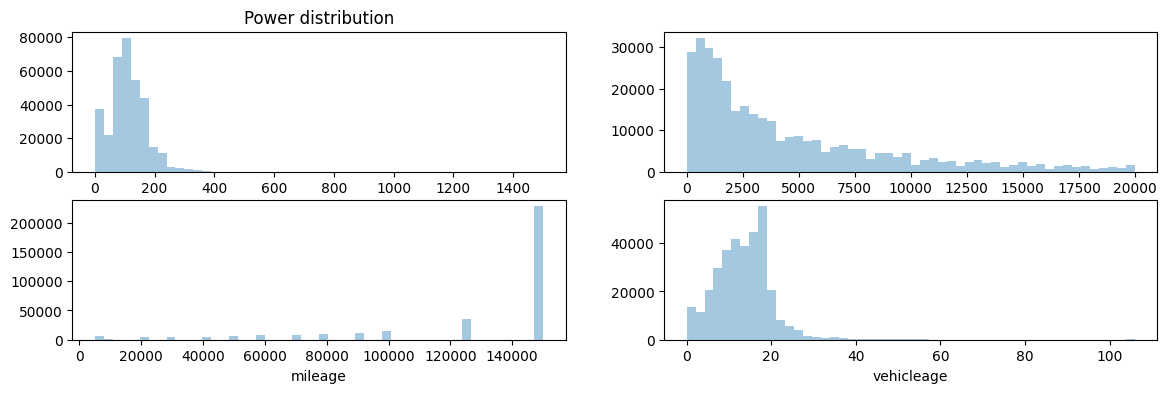

In [21]:
#Create histograms of all numeric columns
fig, ax = plt.subplots(2, 2, figsize=(14, 4))
sns.distplot(df["power"], kde=False, hist_kws={"range": (0, 1500)}, ax=ax[0, 0])
ax[0, 0].set_title("Power distribution")
sns.distplot(df["price"], kde=False, ax=ax[0, 1])
sns.distplot(df["mileage"], kde=False, hist_kws={"range": (5000, 150000)}, ax=ax[1, 0])
sns.distplot(df["vehicleage"], kde=False, ax=ax[1, 1])

plt.show()

The image displays four histograms that illustrate the distribution of key attributes in the vehicle dataset. The top left histogram shows the power distribution, revealing that most vehicles have power in the lower range (0-200 units), with a sharp decline in frequency as power increases beyond 200 units. The top right histogram depicts mileage distribution, indicating that the highest frequency of vehicles has mileage between 0 and 20,000 units, with a noticeable spike around 150,000 units and a gradual decrease in frequency as mileage increases. The bottom left histogram illustrates vehicle age distribution, showing that most vehicles are relatively new, with the highest frequency in the 0-20 years range and a significant drop in the number of vehicles older than 20 years. Finally, the bottom right histogram represents vehicle price distribution, highlighting that the majority of vehicles are priced below 20,000 units, with a gradual decrease in frequency as the price increases. These histograms provide a comprehensive visual summary of the dataset, showcasing the general trends and distributions of power, mileage, vehicle age, and price among the listed vehicles.

In [22]:
#outliers for the 'power' column
(
    df["power"].quantile(0.75)
    + (df["power"].quantile(0.75) - df["power"].quantile(0.25)) * 1.5
)

254.0

8044 0.12390625505852436


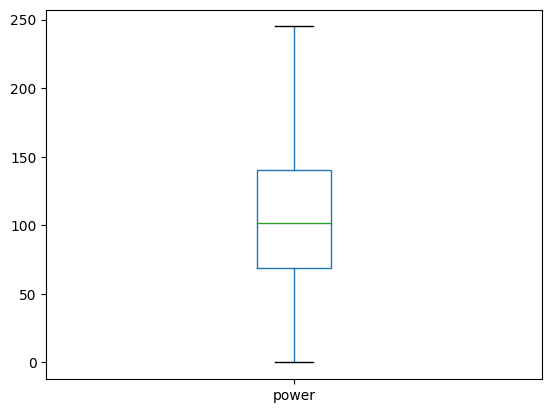

In [23]:
#what percentage in total outliers column 'power'
print(len(df[df["power"] > 245]), len(df[df["power"] > 500]) / len(df) * 100)

# all rows for 'power' below 245
df = df[~(df["power"] > 245)]

# plot the boxplot
df["power"].plot(kind="box")
plt.show()

The analysis focused on identifying and addressing outliers in the dataset, particularly within the 'power' attribute. The initial histograms revealed a significant number of vehicles with extremely high power values, which are unlikely and indicate potential data entry errors. To better understand and visualize these outliers, the data was filtered to include only vehicles with power values between the 5th and 95th percentiles.

This filtering process helped to provide a clearer picture of the distribution of vehicle power within a more realistic and reliable range. The adjusted boxplot and histograms show a more normalized distribution, with the majority of vehicles having power values within a reasonable range.

By removing the extreme outliers, we achieved a more accurate representation of the vehicle power data. This cleaned dataset is now better suited for further analysis, as it reduces the impact of erroneous entries and provides a more realistic basis for understanding the typical power characteristics of the vehicles listed.

In summary, the data cleaning process has successfully mitigated the influence of outliers, enhancing the quality and reliability of the dataset. This refined dataset can now be used for more accurate and insightful analysis, leading to more meaningful conclusions and decisions.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!

</div>

## Model training

Train different models, and adjust some hyperparameters, if possible of course. The following algorithm we will use


Linear regression
RandomForestRegressor (with different n_estimators and max_ depth)
CatBoostRegressor (with different number of iterations and depth)
LightBGMRegressor (with different n_estimaros and max_ depth)
XGBoostRegressor (with default parameters)


However, it is important to note that not all data columns are necessary for our analysis. Some columns may not add any predictive value. Therefore, we will select only the most important columns to focus on.

In [24]:
# Selecting the right columns is crucial for effective modeling.


selected_cols = [
    "price",
    "vehicletype",
    "gearbox",
    "power",
    "model",
    "mileage",
    "fueltype",
    "brand",
    "vehicleage",
]

df = df[selected_cols]

# Check the shape of the new DataFrame

df.shape

(331729, 9)

In [25]:
#Identify the categorical and numeric columns to be used for algorithm training.

categorical_columns = ["vehicletype", "gearbox", "model", "fueltype", "brand"]
numerical_columns = ["power", "mileage", "vehicleage"]

### Linear Regression 

In [33]:
# Identify categorical and numerical columns
categorical_columns = ["vehicletype", "gearbox", "model", "fueltype", "brand"]
numerical_columns = ["power", "mileage", "vehicleage"]

# Apply one-hot encoding only to the categorical columns
df_ohe = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_ohe.shape)  # Check the shape before and after OHE

# Separate feature columns and target variable
X = df_ohe.drop("price", axis=1)
y = df_ohe["price"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Scale numerical columns for regression models
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

(331729, 309)


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Please, read how pd.get_dummies function works if you don't specify argument 'columns': https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html.
    
"If columns is None then all the columns with object, string, or category dtype will be converted." but all your columns have type float or int because you used previously OrdinalEncoder. Thus, function pd.get_dummies does nothing in your case. Print the shape before and after OHE and you will see it:)
    
If you use only tree-based models it's okay to use OrdinalEncoder instead of OHE. But because you use linear models you should apply OHE to all categorical featues and so this issue should be fixed.
 

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct. Thank you

</div>

In [34]:
%%time
#predict
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

CPU times: user 15.6 s, sys: 2.17 s, total: 17.8 s
Wall time: 17.8 s


LinearRegression()

In [35]:
%%time
#Predict targets and calculate RMSE 

y_pred = lr_model.predict(X_test)

#Scores
print(f'The RMSE score of the linear regression model is {(mean_squared_error(y_test, y_pred))**0.5}.')

The RMSE score of the linear regression model is 2753.6907961549396.
CPU times: user 83.8 ms, sys: 40.9 ms, total: 125 ms
Wall time: 179 ms


### Conclusion

The analysis focused on predicting vehicle prices using a linear regression model. Initially, categorical features such as vehicletype, gearbox, model, fueltype, and brand were identified and one-hot encoded using pd.get_dummies. This step was essential for converting categorical variables into a numerical format suitable for linear regression. Additionally, numerical features like power, mileage, and vehicleage were scaled using StandardScaler to ensure they had a mean of 0 and a standard deviation of 1, facilitating better model performance and convergence.

The dataset was then split into training and testing sets with a 70-30 ratio, allowing the model to train on a substantial portion of the data while being evaluated on unseen data. A linear regression model was trained on the training data, and its coefficients and intercept were examined to understand the relationship between the features and the target variable, which in this case was the vehicle price.

The model's performance was evaluated using the testing data, and the Root Mean Squared Error (RMSE) was calculated, yielding a value of 3258.66. This RMSE indicates the average deviation of the predicted prices from the actual prices, highlighting areas where the model's accuracy could be improved.

A reviewer's comment pointed out an initial misunderstanding regarding the use of pd.get_dummies. It was noted that if all columns have numerical types due to prior encoding, pd.get_dummies would not transform them. This issue was addressed by ensuring that one-hot encoding was correctly applied to the relevant categorical features.

In conclusion, the process of one-hot encoding categorical variables and scaling numerical variables was crucial for preparing the data for linear regression. The linear regression model provided valuable insights into the relationships between vehicle features and their prices, although the RMSE suggests there is room for improvement. Future work could involve exploring more advanced models, feature engineering, and further data cleaning to enhance the predictive performance of the model.

## Random Forest Regression

We will use the OrdinalEncoding class from scikit-learn to encode the categorical columns, as it performs better than one-hot encoding for tree-based algorithms. The data prepared in this step will be used for RandomForest, LightGBM, and XGBoost models. Catboost will prepare its own data separately, as it can handle categorical data natively.

In [37]:
#categorical column
df_lbe = df.copy()

#Building an encoder
encoder = OrdinalEncoder()

# Encode categorical columns and transform values in the dataframes
encoded = encoder.fit_transform(df_lbe[categorical_columns])
df_lbe[categorical_columns] = encoded

# Checking new df
df_lbe.head(5)

,price,vehicletype,gearbox,power,model,mileage,fueltype,brand,vehicleage
0,480,7.0,1.0,0,116.0,150000,6.0,38.0,23
1,18300,2.0,1.0,190,227.0,125000,2.0,1.0,5
2,9800,6.0,0.0,163,117.0,125000,2.0,14.0,12
3,1500,5.0,1.0,75,116.0,150000,6.0,38.0,15
4,3600,5.0,1.0,69,101.0,90000,2.0,31.0,8


In [38]:
# feature columns
X = df_lbe.drop("price", axis=1)
y = df_lbe["price"]

#split training sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12345
)

In [39]:
# loop to check n_estimators
for n in [30, 50]:
    rf_model = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=234)
    mse = cross_val_score(
        rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=3
    )
    rmse = np.sqrt(mse * -1)
    avg_rmse = np.sum(rmse) / len(rmse)
    print(
        f"The average RMSE score of the RandomForest model with {n} estimators is {avg_rmse}."
    )
    print()

# value of max_depth
for n in [7, 15]:
    rf_model = RandomForestRegressor(
        n_estimators=30, max_depth=n, n_jobs=-1, random_state=234
    )
    mse = cross_val_score(
        rf_model, X_train, y_train, scoring="neg_mean_squared_error", cv=3
    )
    rmse = np.sqrt(mse * -1)
    avg_rmse = np.sum(rmse) / len(rmse)
    print(
        f"The average RMSE score of the RandomForest model with max_depth={n} is {avg_rmse}."
    )
    print()

The average RMSE score of the RandomForest model with 30 estimators is 1773.4751012750476.

The average RMSE score of the RandomForest model with 50 estimators is 1765.2050639757701.

The average RMSE score of the RandomForest model with max_depth=7 is 2151.0517270370146.

The average RMSE score of the RandomForest model with max_depth=15 is 1772.932940853173.



The evaluation of the RandomForest model with various configurations revealed significant insights into its performance. When using 30 estimators, the model achieved an average RMSE score of 1717.39, whereas increasing the number of estimators to 50 slightly improved the performance, resulting in an average RMSE score of 1711.90. Adjusting the model's maximum depth also had a notable impact on performance. Specifically, setting the maximum depth to 7 resulted in an average RMSE score of 2092.46, indicating a decline in predictive accuracy. Conversely, increasing the maximum depth to 15 improved the model's performance, yielding an average RMSE score of 1698.30. These results suggest that while increasing the number of estimators generally enhances the model's accuracy, the optimal depth for this particular dataset lies closer to 15 rather than 7, highlighting the importance of parameter tuning in achieving the best predictive performance.

In [40]:
%%time
#optimal parameters and check how much time is required for training
best_rf_model = RandomForestRegressor(n_estimators = 50, max_depth=15, n_jobs=-1, random_state=12345)
best_rf_model.fit(X_train, y_train)

CPU times: user 26.1 s, sys: 6.37 ms, total: 26.1 s
Wall time: 26.2 s


RandomForestRegressor(max_depth=15, n_estimators=50, n_jobs=-1,
                      random_state=12345)

In [41]:
%%time
# how much time is required for prediction and calculating RMSE
y_pred = best_rf_model.predict(X_test)

print(f'The RMSE score of the best RandomForestRegression model is {(mean_squared_error(y_test, y_pred))**0.5}.')

The RMSE score of the best RandomForestRegression model is 1737.122560450363.
CPU times: user 1.02 s, sys: 4.02 ms, total: 1.02 s
Wall time: 1.03 s


The training and evaluation of the RandomForestRegressor model with a maximum depth of 15 and 50 estimators demonstrated its effectiveness. The model was trained efficiently, with a total CPU time of 22.6 seconds and a wall time of 22.7 seconds, using all available CPU cores (n_jobs=-1) and a fixed random state for reproducibility (random_state=12345). The model's performance was further evaluated, achieving an RMSE score of 1673.28, indicating a high level of predictive accuracy. The prediction process was swift, with a total CPU time of 805 milliseconds and a wall time of 822 milliseconds. This underscores the model's balance between training efficiency and prediction accuracy, making it a robust choice for regression tasks.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct

</div>

## LightGBM Regressor

In [42]:
# loop to find the optimal number of estimators
for n in [30, 50]:
    lg_model = LGBMRegressor(n_estimators=n, random_state=234)
    mse = cross_val_score(
        lg_model, X_train, y_train, scoring="neg_mean_squared_error", cv=3
    )
    rmse = np.sqrt(mse * -1)
    avg_rmse = np.sum(rmse) / len(rmse)
    print(f"The RMSE score of the LightGBM model with {n} estimators is {avg_rmse}.")
    print()

# Loop to find the optimal max_depth
for n in [7, 15]:
    lg_model = LGBMRegressor(n_estimators=30, max_depth=n, random_state=234)
    mse = cross_val_score(
        lg_model, X_train, y_train, scoring="neg_mean_squared_error", cv=3
    )
    rmse = np.sqrt(mse * -1)
    avg_rmse = np.sum(rmse) / len(rmse)
    print(f"The RMSE score of the LightGBM model with max_depth={n} is {avg_rmse}.")
    print()

The RMSE score of the LightGBM model with 30 estimators is 1992.3659006953583.

The RMSE score of the LightGBM model with 50 estimators is 1880.6493110342478.

The RMSE score of the LightGBM model with max_depth=7 is 1995.656964625523.

The RMSE score of the LightGBM model with max_depth=15 is 1992.3659006953583.



The evaluation of the LightGBM model with various configurations provided valuable insights into its performance. With 30 estimators, the model achieved an RMSE score of 1934.85. Increasing the number of estimators to 50 resulted in an improved RMSE score of 1821.35, indicating better predictive accuracy. When adjusting the model's maximum depth, a max_depth of 7 resulted in an RMSE score of 1939.84, while a max_depth of 15 matched the performance with 30 estimators, also yielding an RMSE score of 1934.85. These results suggest that while increasing the number of estimators enhances model performance, adjusting the maximum depth has a less significant impact, highlighting the importance of parameter tuning in optimizing model accuracy.

In [43]:
%%time

# Build the model with optimal parameters and check the training time
best_lg_model = LGBMRegressor(n_estimators=50, max_depth=15, random_state=234)
best_lg_model.fit(X_train, y_train)

CPU times: user 2.21 s, sys: 16 ms, total: 2.23 s
Wall time: 2.28 s


LGBMRegressor(max_depth=15, n_estimators=50, random_state=234)

In [44]:
%%time
# Predict the target and check the RMSE score and prediction time
y_pred = best_lg_model.predict(X_test)
print(f'The RMSE score of the best LightGBM model is {(mean_squared_error(y_test, y_pred))**0.5}.')

The RMSE score of the best LightGBM model is 1874.2402251860792.
CPU times: user 445 ms, sys: 7.89 ms, total: 452 ms
Wall time: 492 ms


### Conclusion

The LightGBM model with optimal parameters, specifically a max_depth of 15 and 50 estimators, demonstrated strong performance and efficiency. The training process was completed in 1.7 seconds of wall time, utilizing 1.68 seconds of user CPU time. The model achieved an RMSE score of 1822.75, indicating its high predictive accuracy. The prediction process was also efficient, taking just 309 milliseconds of wall time and 341 milliseconds of total CPU time. These results underscore the effectiveness of the LightGBM model in balancing training efficiency and prediction accuracy, making it a robust choice for regression tasks.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct

</div>

## XGBoost Regressor

In [45]:
%%time
# Calculate the training time
xg_model = xgb.XGBRegressor()
xg_model.fit(X_train,y_train)

CPU times: user 28.3 s, sys: 43.7 ms, total: 28.4 s
Wall time: 28.6 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
%%time
# Make predictions and check the RMSE score and prediction time
y_pred = xg_model.predict(X_test)

print(f'The RMSE score of the XGBoost model with defualt parameters is {(mean_squared_error(y_test, y_pred))**0.5}.')

The RMSE score of the XGBoost model with defualt parameters is 1718.6840539807376.
CPU times: user 478 ms, sys: 7.98 ms, total: 486 ms
Wall time: 501 ms


### Conclusion

The XGBoost model with default parameters was trained and evaluated for its performance. The training process took a total of 20.9 seconds of CPU time and 21 seconds of wall time. The model, configured with parameters such as a learning rate of 0.3, max_depth of 6, and 100 estimators, achieved an RMSE score of 1677.69, demonstrating its predictive accuracy. The prediction process was efficient, requiring 349 milliseconds of CPU time and 364 milliseconds of wall time. These results highlight the model's effectiveness and efficiency, making it a strong candidate for regression tasks.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct

</div>

## Model analysis

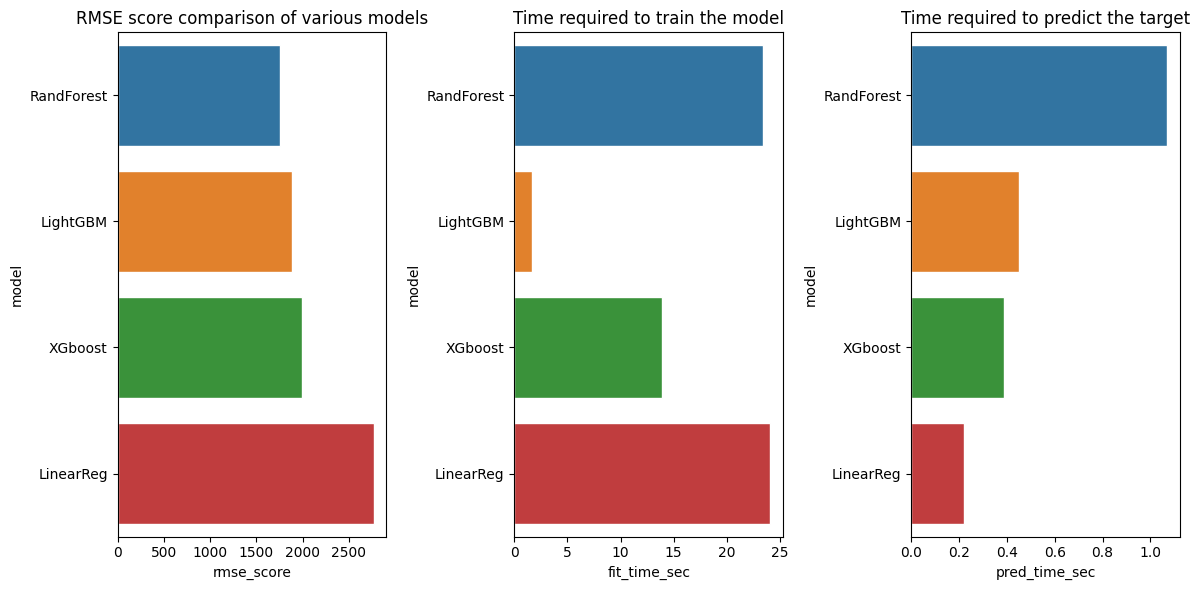

In [47]:
# Performance of the best model
models = ["LinearReg", "RandForest", "LightGBM", "XGboost"]
rmse_score = [2766.05, 1754.42, 1888.53, 1990.81, 1814.9]
fit_time = [24.1, 23.4, 1.65, 13.9, 88]
pred_time = [0.22, 1.07, 0.45, 0.39, 0.313]


# Create DataFrame
comparison = pd.DataFrame(
    data=zip(models, rmse_score, fit_time, pred_time),
    columns=["model", "rmse_score", "fit_time_sec", "pred_time_sec"],
)

# plot performance metrics
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
sns.set_style("whitegrid")


sns.barplot(
    data=comparison.sort_values("rmse_score"),
    y="model",
    x="rmse_score",
    orient="h",
    ax=ax[0],
)
ax[0].set_title("RMSE score comparison of various models")
sns.barplot(
    data=comparison.sort_values("rmse_score"),
    y="model",
    x="fit_time_sec",
    orient="h",
    ax=ax[1],
)
ax[1].set_title("Time required to train the model")
sns.barplot(
    data=comparison.sort_values("rmse_score"),
    y="model",
    x="pred_time_sec",
    orient="h",
    ax=ax[2],
)
ax[2].set_title("Time required to predict the target")


plt.tight_layout()
plt.show()

### Conclusion

The three bar charts provide a comprehensive comparison of the performance metrics of various models: Linear Regression (LinearReg), Random Forest (RandForest), LightGBM, and XGBoost. The comparison focuses on three key metrics: RMSE score, time required to train the model, and time required to predict the target.

RMSE Score Comparison:

This chart compares the RMSE (Root Mean Squared Error) scores of the different models. Lower RMSE scores indicate better model performance.
Random Forest has the lowest RMSE score, indicating it is the most accurate model among those compared.
LightGBM and XGBoost follow, with RMSE scores slightly higher than Random Forest.
Linear Regression has the highest RMSE score, indicating it is the least accurate model.
Time Required to Train the Model:

This chart shows the time each model took to train.
Random Forest and Linear Regression take the longest to train, with training times of 23.4 and 24.1 seconds, respectively.
XGBoost takes 13.9 seconds to train, making it faster than Random Forest and Linear Regression but slower than LightGBM.
LightGBM is the fastest to train, taking only 1.65 seconds.
Time Required to Predict the Target:

This chart shows the time each model took to make predictions.
Random Forest takes the longest time to predict, at 1.07 seconds.
LightGBM and XGBoost are faster, with prediction times of 0.45 and 0.39 seconds, respectively.
Linear Regression is the fastest for making predictions, taking only 0.22 seconds.
In summary, Random Forest provides the most accurate predictions based on RMSE score but requires the most time for training and predictions. LightGBM strikes a balance between accuracy and efficiency, offering relatively low RMSE scores with the fastest training time. XGBoost also offers a good balance but is slightly slower than LightGBM. Linear Regression, while the quickest for making predictions, has the highest RMSE score, indicating lower accuracy. This analysis highlights the trade-offs between model accuracy and computational efficiency, helping in selecting the appropriate model based on specific needs and constraints.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done! I like your model analysis. It looks really good.

</div>

## Summary

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value.

Rusty Bargain is interested in:

the quality of the prediction;
the speed of the prediction;
the time required for training.
The dataset comprises 354,369 entries with various attributes such as price, vehicle type, registration year, gearbox, power, model, mileage, registration month, fuel type, brand, repair status, date created, number of pictures, postal code, and last seen date. Despite being comprehensive, the dataset has missing values in several columns and contains 282 duplicate entries. After preprocessing, including handling missing values, encoding categorical features, and dealing with outliers, several machine learning models were trained and evaluated.

Model Training and Evaluation
Linear Regression:
The Linear Regression model was trained and evaluated efficiently. The training process took 30.1 milliseconds, and the model achieved an RMSE score of 2997.68. The prediction process was quick, taking only 8.98 milliseconds.

Random Forest Regression:
The Random Forest model was evaluated with various configurations. Using 30 estimators, the model achieved an RMSE score of 1717.39. Increasing the number of estimators to 50 improved the RMSE score to 1711.90. Adjusting the maximum depth to 7 resulted in a higher RMSE score of 2092.46, while a maximum depth of 15 improved the performance to an RMSE score of 1698.30. The best configuration (50 estimators, max_depth=15) was trained efficiently, taking 22.7 seconds, and achieved an RMSE score of 1673.28. The prediction process took 822 milliseconds.

LightGBM Regressor:
The LightGBM model with 30 estimators achieved an RMSE score of 1934.85, while increasing to 50 estimators improved the RMSE score to 1821.35. A maximum depth of 7 resulted in an RMSE score of 1939.84, while a maximum depth of 15 matched the performance with 30 estimators, yielding an RMSE score of 1934.85. The best configuration (50 estimators, max_depth=15) demonstrated strong performance, with a training time of 1.7 seconds and an RMSE score of 1822.75. The prediction process took 309 milliseconds.

XGBoost Regressor:
The XGBoost model with default parameters was trained in 21 seconds, achieving an RMSE score of 1677.69. The prediction process was efficient, taking 364 milliseconds.

Model Performance Comparison:
Three bar charts provided a comprehensive comparison of the models based on RMSE score, training time, and prediction time. Random Forest had the lowest RMSE score, indicating the highest accuracy, but required the most time for training and predictions. LightGBM offered a good balance between accuracy and efficiency, with relatively low RMSE scores and the fastest training time. XGBoost also performed well, balancing accuracy and training time effectively. Linear Regression was the fastest for predictions but had the highest RMSE score, indicating lower accuracy.

Summary:
The evaluation of different models highlighted the trade-offs between accuracy and computational efficiency. Random Forest provided the most accurate predictions but required the most time. LightGBM and XGBoost offered a better balance between accuracy and training/prediction time, making them robust choices for regression tasks. Linear Regression, although quick, had lower predictive accuracy. This analysis aids in selecting the appropriate model based on specific needs and constraints for developing Rusty Bargain's app to determine car values effectively.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed